# Data Exploration and Visualization
## __[Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)__


### Setup

In [62]:
#Check Python version
!python -V

#Import common packages
import pandas as pd
import matplotlib.pyplot as plt

Python 3.9.7


### Import Data

In [63]:
df = pd.read_csv("winequality-white.csv", sep=";")
#df = pd.read_csv("train.csv")

### Inspect Data

In [64]:
#Inspect first 5 rows

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [65]:
#Some statistics for each coloumn

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<div class="alert alert-block alert-success">
<b>Note:</b> There are no missing values in any column.
</div>

In [66]:
# See unique values for Quality series.

df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

<div class="alert alert-block alert-danger">
<b>Note:</b> In this sample, there are only 5 very high quality wines and only 20 poor quality wines.
</div>

In [67]:
#Statistical Summary

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


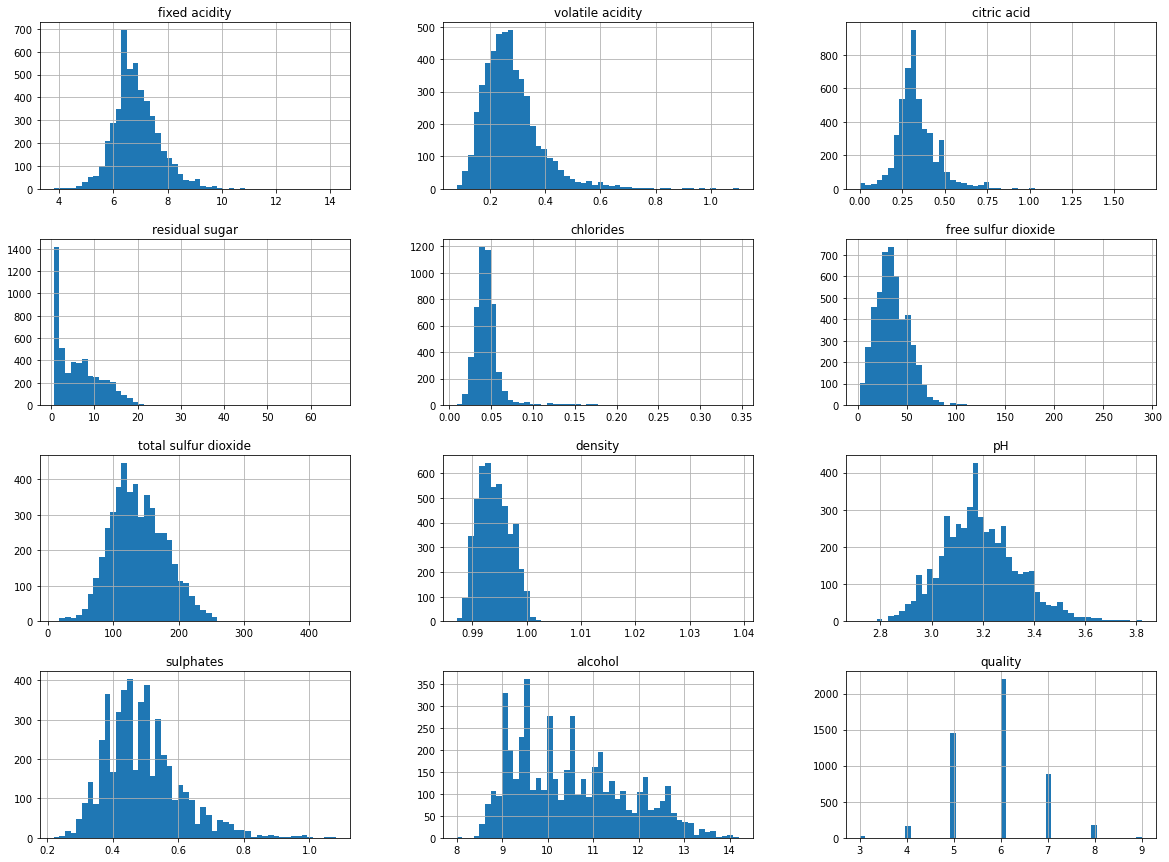

In [68]:
#Histograms

df.hist(bins=50, figsize=(20,15))
plt.show()

In [69]:
# Correlation 

corr_matrix = df.corr()

In [70]:
# Pairwise correlation for all columns

print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [71]:
# Correlation for just the alcohol series

corr_matrix.alcohol.sort_values(ascending=False)

alcohol                 1.000000
quality                 0.435575
pH                      0.121432
volatile acidity        0.067718
sulphates              -0.017433
citric acid            -0.075729
fixed acidity          -0.120881
free sulfur dioxide    -0.250104
chlorides              -0.360189
total sulfur dioxide   -0.448892
residual sugar         -0.450631
density                -0.780138
Name: alcohol, dtype: float64

<div class="alert alert-block alert-danger">
<b>Note:</b> Alcohol has high correlation with density.
</div>

In [72]:
# Correlation for just the alcohol series

corr_matrix.density.sort_values(ascending=False)

density                 1.000000
residual sugar          0.838966
total sulfur dioxide    0.529881
free sulfur dioxide     0.294210
fixed acidity           0.265331
chlorides               0.257211
citric acid             0.149503
sulphates               0.074493
volatile acidity        0.027114
pH                     -0.093591
quality                -0.307123
alcohol                -0.780138
Name: density, dtype: float64

<div class="alert alert-block alert-danger">
<b>Note:</b> Density has high correlation with residual sugar.
</div>

Reason:

***[The density of an alcoholic beverage is basically derived from 1) The amount of sugar left in the beverage (less sugar = more alcohol = lighter weight) and 2) whatever other extras are added to the liquid (taste givers, aetheric oils, water etc).](https://bartenderly.com/tips-tricks/alcohol-density-chart/)***

array([[<AxesSubplot:xlabel='quality', ylabel='quality'>,
        <AxesSubplot:xlabel='alcohol', ylabel='quality'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='quality'>,
        <AxesSubplot:xlabel='density', ylabel='quality'>],
       [<AxesSubplot:xlabel='quality', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='alcohol'>,
        <AxesSubplot:xlabel='density', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='quality', ylabel='residual sugar'>,
        <AxesSubplot:xlabel='alcohol', ylabel='residual sugar'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='residual sugar'>,
        <AxesSubplot:xlabel='density', ylabel='residual sugar'>],
       [<AxesSubplot:xlabel='quality', ylabel='density'>,
        <AxesSubplot:xlabel='alcohol', ylabel='density'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='density'>,
        <AxesSubplot:xlabel='density', ylabel='density'>]], dtype=objec

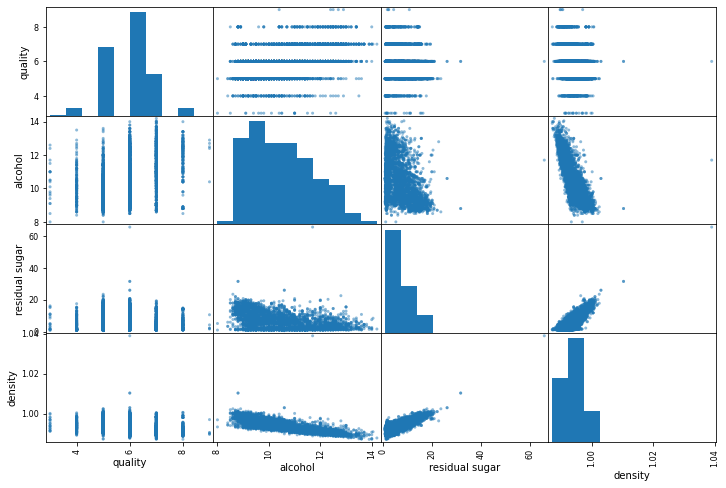

In [73]:
#There arent many interesting scatterplots for this data.

from pandas.plotting import scatter_matrix

attributes = ["quality", "alcohol", "residual sugar", "density"]

scatter_matrix(df[attributes], figsize=(12, 8))

(0.0, 50.0, 0.96, 1.05)

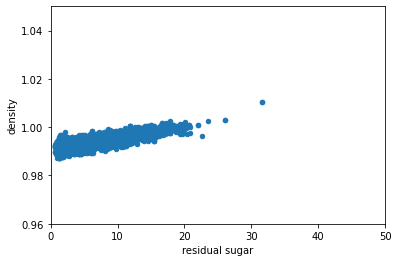

In [74]:
# Closer look at density-sugar plot

df.plot(kind="scatter", x="residual sugar", y="density")
             
plt.axis([0, 50, 0.96, 1.05])